In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot     as plt

In [88]:
from google.colab import drive
#mount google drive folder
drive = drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/myocardial_data/myocardial_db.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,...,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,...,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,...,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,...,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,...,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
#Rule: Variables with more than 60% missing values should not be considered
df.drop(columns=['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG'], inplace=True)

In [91]:
#numerical variables
numerical_variables=['AGE'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE']

#categorical variables
categorical_variables=['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03'#, 'IBS_NASL'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S'
, 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

#ordinal variables
ordinal_variables=['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'DLIT_AG',
                   'ant_im', 'lat_im', 'inf_im', 'post_im', 'TIME_B_S',
                   'ZSN_A', #partially ordinal
                   'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n',  #1 day
                   'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n',  #2 day
                   'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n' #3 day
                   ]

In [92]:
#Convert all numerical variables to floats
for var in numerical_variables:
    df[var]=df[var].astype(float)

#fill null values in numerical variables
for i in numerical_variables:
  df[i]=df[i].interpolate(method='linear', limit_direction='both')
  df[i]=df[i].fillna(df[i].median())

In [93]:
for i in ordinal_variables:
  df[i]=df[i].fillna(df[i].mode()[0])

In [94]:
#fill null values in binary variables with mode

for i in categorical_variables:
  df[i]=df[i].fillna(df[i].mode()[0])  
  df[i]=df[i].astype(int)  

In [95]:
null_values=pd.DataFrame(df.isna().sum()/(len(df))*100).reset_index()
null_values.rename(columns={'index':'Variable',0:'null_perc'}, inplace=True)
null_values.sort_values(by='null_perc', ascending=False)

,Variable,null_perc
0,AGE,0.0
75,fibr_ter_06,0.0
87,R_AB_1_n,0.0
86,TIME_B_S,0.0
85,ROE,0.0
...,...,...
35,K_SH_POST,0.0
34,O_L_POST,0.0
33,D_AD_ORIT,0.0
32,S_AD_ORIT,0.0


In [ ]:
df['INF_ANAM']

In [96]:
#Feature scaling: Standardize data in numerical variables
for var in numerical_variables:
    df[var]=(df[var] - df[var].mean())/df[var].std()
    
#Apply one hot encoding on categorical variables
#df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,...,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.343342,1,2.0,1.0,1.0,2.0,3.0,0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.539367,1.034363,0,0,0,0,0,0,...,0.702749,0,0.239365,-0.273879,-0.435117,-0.238007,0.223117,4.0,0.0,0.0,1.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.609888,1,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.399095,0.477461,0,0,0,0,0,0,...,-0.953452,0,-0.739790,-0.273879,-0.435117,-0.297588,-0.960060,2.0,0.0,0.0,0.0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.876238,1,0.0,0.0,0.0,2.0,2.0,0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.539367,1.034363,0,0,0,0,0,0,...,-0.263368,0,-0.739790,-0.488865,-0.799963,0.596127,-0.982813,3.0,3.0,0.0,0.0,1,1,1,0,1.0,0.0,0.0,3.0,2.0,2.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.544293,0,0.0,0.0,0.0,2.0,2.0,0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.399095,-0.636342,0,0,0,0,0,0,...,-0.401385,0,1.544905,0.720434,0.555179,0.223746,-1.005567,2.0,0.0,0.0,1.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,-0.165972,1,0.0,0.0,0.0,2.0,3.0,0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.893213,0.477461,0,0,0,0,0,0,...,-0.953452,0,-0.739790,-0.085765,-0.226634,-0.148635,-1.028320,9.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
#define different sets for the different moments of prediction
df0=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S'
, 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

df1=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n'
, 'NOT_NA_1_n', 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

df2=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n'
, 'NOT_NA_1_n', 'NOT_NA_2_n', 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

df3=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST'#, 'IBS_NASL'
, 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03'
, 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09'
, 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02'
, 'zab_leg_03', 'zab_leg_04', 'zab_leg_06'#, 'S_AD_KBRIG', 'D_AD_KBRIG'
, 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
, 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
, 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06'
, 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02'
, 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
, 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01'
, 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
, 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
, 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
, 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K'
, 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD'#, 'KFK_BLOOD'
, 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB'
, 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n'
, 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n'
, 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 
'ZSN']]

Modelling

In [98]:
X=df0.drop('ZSN', axis=1)
y=df0['ZSN']

In [99]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 1306, 1: 394})


In [100]:
weight= 1306/(394+1306)
print(weight)

0.768235294117647


In [101]:
#scale_pos_weight for balancing the classifier
scale_pos_weight=(1306/394)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

In [103]:
print ('Train data has %i rows and %i columns' % (X_train.shape[0], X_train.shape[1]))
print ('Test data has %i rows and %i columns' % (X_test.shape[0], X_test.shape[1]))

Train data has 1360 rows and 98 columns
Test data has 340 rows and 98 columns


In [104]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.2,
                                                    stratify=y_train,
                                                    random_state=2)

In [105]:
print ('Train data has %i rows and %i columns' % (X_train.shape[0], X_train.shape[1]))
print ('Validation data has %i rows and %i columns' % (X_val.shape[0], X_val.shape[1]))

Train data has 1088 rows and 98 columns
Validation data has 272 rows and 98 columns


Search for best parameters

Text(0.5, 1.0, 'Correlation Matrix')

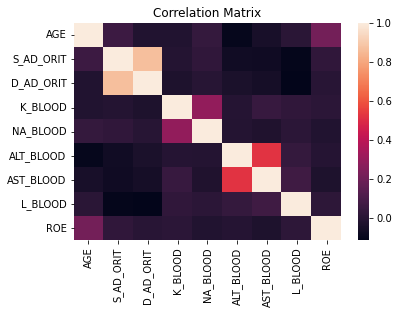

In [106]:
import matplotlib.pyplot     as plt
import seaborn               as sns
corr_mat  = df[numerical_variables].corr()
sns.heatmap(corr_mat)
plt.title("Correlation Matrix")

# XGBoost

Hyperparameter Tuning

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier

In [108]:
from sklearn.metrics import roc_auc_score
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()
#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='recall', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

train_predictions = clf0.predict(X_train)
val_predictions = clf0.predict(X_val)
test_predictions = clf0.predict(X_test)
val_ras = roc_auc_score(y_val, clf0.predict_proba(X_val)[:,1])
unseen_ras = roc_auc_score(y_test, clf0.predict_proba(X_test)[:,1])

bp = clf0.best_params_
print(bp)

y_pred_test0 = clf0.predict(X_test)
print(classification_report(y_test, y_pred_test0))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'eval_metric': 'auc', 'gamma': 0, 'grow_policy': 'lossguide', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'tree_method': 'hist', 'use_label_encoder': False, 'verbosity': 1}
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       267
           1       0.71      0.23      0.35        73

    accuracy                           0.81       340
   macro avg       0.77      0.60      0.62       340
weighted avg       0.80      0.81      0.78       340



Hyperparameter tuning doesn't really contribute as knowing well the problems is a human ability. What GridSearch does is maximizing accuracy.

In [ ]:
#Didn't use it
training_data = {'X_train':X_train,'Y_train':y_train.values,
                'X_val': X_val,'Y_val':y_val.values,
                'X_test': X_test,'Y_test':y_test.values}

In [ ]:
#I'm not using it
#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=X_train,epochs=20):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)

In [ ]:
#neither this one
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    max_depth=5,
                    gamma=3,
                    subsample=0.8,
                    colsample_bytree=0.3,
                    objective='binary:logitraw',
                    num_class=2,
                    seed=27,
                    scale_pos_weight=3.315)

In [109]:
grid = {'learning_rate':0.1, 'max_depth':5, 'scale_pos_weight':3.315}
clf = XGBClassifier()
clf.set_params(**grid)

XGBClassifier(max_depth=5, scale_pos_weight=3.315)

In [110]:
clf.fit(X_train, y_train)

XGBClassifier(max_depth=5, scale_pos_weight=3.315)

In [111]:
y_pred_test = clf.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       267
           1       0.52      0.45      0.48        73

    accuracy                           0.79       340
   macro avg       0.69      0.67      0.68       340
weighted avg       0.78      0.79      0.79       340



Changing the weights to balance the model improves a lot the performance of the model on predicting the CHF, but there's still room for improvement.


In [112]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance:")

for f in range(X_train.shape[1]):
    print("Feature %s (%f)" % (X_train.columns[int(indices[f])], importances[indices[f]]))

Feature importance:
Feature ZSN_A (0.077149)
Feature endocr_01 (0.035986)
Feature NOT_NA_KB (0.032644)
Feature MP_TP_POST (0.029025)
Feature ritm_ecg_p_02 (0.026770)
Feature lat_im (0.026042)
Feature post_im (0.024949)
Feature K_SH_POST (0.024582)
Feature AGE (0.023771)
Feature n_r_ecg_p_03 (0.023573)
Feature ritm_ecg_p_01 (0.021186)
Feature ant_im (0.020518)
Feature L_BLOOD (0.020154)
Feature GB (0.019957)
Feature INF_ANAM (0.019583)
Feature S_AD_ORIT (0.019148)
Feature DLIT_AG (0.018382)
Feature n_p_ecg_p_12 (0.018313)
Feature zab_leg_01 (0.018206)
Feature ALT_BLOOD (0.017602)
Feature zab_leg_02 (0.017570)
Feature ROE (0.017260)
Feature TIME_B_S (0.016471)
Feature IBS_POST (0.016372)
Feature SEX (0.016277)
Feature K_BLOOD (0.016258)
Feature D_AD_ORIT (0.016066)
Feature fibr_ter_03 (0.015980)
Feature inf_im (0.015947)
Feature AST_BLOOD (0.015914)
Feature NITR_S (0.015893)
Feature NA_BLOOD (0.015522)
Feature ANT_CA_S_n (0.015506)
Feature n_p_ecg_p_07 (0.015391)
Feature LID_S_n (0.01507

In [113]:
cm=confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm.astype(int))
cm_df

,0,1
0,236,31
1,40,33


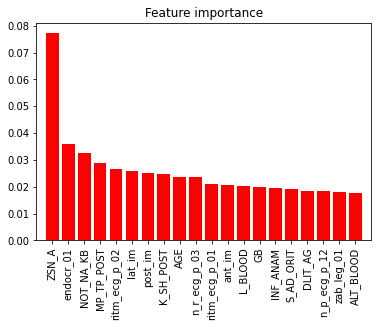

In [114]:
top=20
plt.figure()
plt.title("Feature importance")
plt.bar(range(top), importances[indices][0:top],
       color="r", align="center")
xticks_labels = [X_train.columns[i] for i in indices[0:top]]
plt.xticks(range(top), xticks_labels, rotation=90)
plt.xlim([-1, top])
plt.show()

Threshold selection

In [115]:
y_proba = clf.predict_proba(X_val)[:,1]
y_proba

array([0.23909652, 0.37546834, 0.37771842, 0.22797127, 0.11304756,
       0.06240946, 0.2629581 , 0.60134953, 0.24662514, 0.3611911 ,
       0.23229177, 0.36782777, 0.11318657, 0.39942086, 0.10652338,
       0.3181761 , 0.9874356 , 0.53971   , 0.54227006, 0.261213  ,
       0.1740234 , 0.1410108 , 0.10099554, 0.25732514, 0.03496839,
       0.2060305 , 0.15638706, 0.28482103, 0.16488703, 0.16932827,
       0.09083533, 0.10305409, 0.54958683, 0.15405269, 0.06204835,
       0.16616859, 0.10615983, 0.2336525 , 0.39668533, 0.57205087,
       0.1812454 , 0.24842694, 0.2632024 , 0.3912794 , 0.33353674,
       0.21063821, 0.45651284, 0.13937557, 0.954981  , 0.05506649,
       0.1441446 , 0.282947  , 0.47393104, 0.43845552, 0.99223244,
       0.1899035 , 0.24505629, 0.08070639, 0.14552255, 0.9830019 ,
       0.2016176 , 0.17259614, 0.02979159, 0.6598834 , 0.38361284,
       0.12455914, 0.20799136, 0.9492535 , 0.5504865 , 0.39818844,
       0.05887115, 0.0323233 , 0.55725175, 0.5320178 , 0.18422

In [116]:
f1_dict = {}
TNR_dict = {}
TPR_dict = {}
proba_array =  np.arange(0.1, 0.9, 0.05).tolist()

for umbral in proba_array:
    
    y_pred_pc = [1 if i > umbral else 0 for i in y_proba]
    
    f1 = f1_score(y_val, y_pred_pc, average = 'macro')
    
    f1_dict[umbral] = f1
    
    CM =confusion_matrix(y_val, y_pred_pc)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    TNR_dict[umbral] = TN/(TN+FP)
    
    TPR_dict[umbral] = TP/(TP+FN)

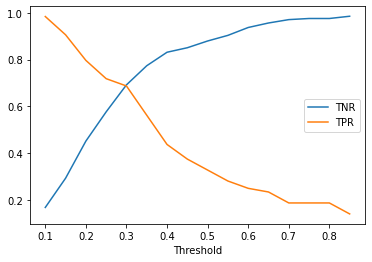

In [117]:
import matplotlib.pylab as plt

lists = sorted(TNR_dict.items()) # sorted by key, return a list of tuples

tnr_x, tnr_y = zip(*lists)

lists2 = sorted(TPR_dict.items()) # sorted by key, return a list of tuples

tpr_x, tpr_y = zip(*lists2)

plt.plot(tnr_x, tnr_y, label='TNR')
plt.plot(tpr_x, tpr_y, label='TPR')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [ ]:
TNR_dict

{0.1: 0.16826923076923078,
 0.15000000000000002: 0.2932692307692308,
 0.20000000000000004: 0.4519230769230769,
 0.25000000000000006: 0.5769230769230769,
 0.30000000000000004: 0.6923076923076923,
 0.3500000000000001: 0.7740384615384616,
 0.40000000000000013: 0.8317307692307693,
 0.45000000000000007: 0.8509615384615384,
 0.5000000000000001: 0.8798076923076923,
 0.5500000000000002: 0.9038461538461539,
 0.6000000000000002: 0.9375,
 0.6500000000000001: 0.9567307692307693,
 0.7000000000000002: 0.9711538461538461,
 0.7500000000000002: 0.9759615384615384,
 0.8000000000000002: 0.9759615384615384,
 0.8500000000000002: 0.9855769230769231}

In [ ]:
TPR_dict

{0.1: 0.984375,
 0.15000000000000002: 0.90625,
 0.20000000000000004: 0.796875,
 0.25000000000000006: 0.71875,
 0.30000000000000004: 0.6875,
 0.3500000000000001: 0.5625,
 0.40000000000000013: 0.4375,
 0.45000000000000007: 0.375,
 0.5000000000000001: 0.328125,
 0.5500000000000002: 0.28125,
 0.6000000000000002: 0.25,
 0.6500000000000001: 0.234375,
 0.7000000000000002: 0.1875,
 0.7500000000000002: 0.1875,
 0.8000000000000002: 0.1875,
 0.8500000000000002: 0.140625}

In [120]:
#Also tried with 0.30,0.32, 0.35 etc. but our objective is to minimize false negatives for the specific purpose
y_pred_pc = [1 if i > 0.32 else 0 for i in y_proba]
cm=confusion_matrix(y_val, y_pred_pc) 
cm_df = pd.DataFrame(cm.astype(int), columns , index)
cm_df

NameError: ignored

I tried all thresholds in [0.3,  0.35]. If I set the threshold to 0.30 istead of 0.32 the FNR rate is even lower: 31%, but in the accuracy report it gets worse. So 0.32 is the threshold.

In [ ]:

CM =confusion_matrix(y_val, y_pred_pc)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TNR_test = TN/(TN+FP)
TPR_test = TP/(TP+FN)
FNR_test= FN/(TP+FN)

print("The True Negative Rate in the validation set is: ","{:.2%}".format(TNR_test))

print("The True Positive Rate in the validation set is: ","{:.2%}".format(TPR_test))

print("The False Negative Rate in the validation set is: ","{:.2%}".format(FNR_test))

The True Negative Rate in the validation set is:  72.60%
The True Positive Rate in the validation set is:  64.06%
The False Negative Rate in the validation set is:  35.94%


In [ ]:
print(classification_report(y_val, y_pred_pc))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       208
           1       0.42      0.64      0.51        64

    accuracy                           0.71       272
   macro avg       0.64      0.68      0.65       272
weighted avg       0.76      0.71      0.72       272



In [ ]:
y_pred_bin = y_pred_pc
y_val_bin = y_val.to_numpy()

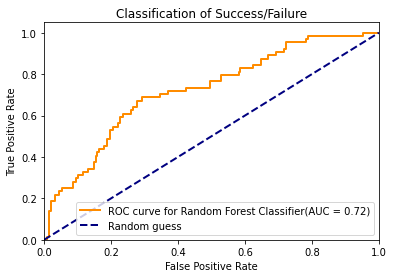

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score
roc_p = roc_curve(y_val_bin, y_proba)
auc_p = auc_p = auc( roc_p[0], roc_p[1] )

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
         label=f"ROC curve for Random Forest Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Success/Failure')
plt.legend(loc='lower right')
plt.show()



Include it in the report

Evaluate over the test set

In [ ]:
# Make predictions for the test set
y_pred_test = clf.predict(X_test)

In [ ]:
y_proba_test = clf.predict_proba(X_test)[:,1]

In [ ]:
y_pred_test_pc = [1 if i > 0.32 else 0 for i in y_proba_test]
cm=confusion_matrix(y_test, y_pred_test_pc)
cm_df = pd.DataFrame(cm.astype(int),columns,index)
cm_df

NameError: ignored

In [ ]:
CM =confusion_matrix(y_test, y_pred_test_pc)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TNR_test = TN/(TN+FP)
TPR_test = TP/(TP+FN)
FNR_test= FN/(TP+FN)

print("The True Negative Rate in the test set is: ","{:.2%}".format(TNR_test))

print("The True Positive Rate in the test set is: ","{:.2%}".format(TPR_test))

print("The False Negative Rate in the test set is: ","{:.2%}".format(FNR_test))

NameError: ignored

In [ ]:
y_pred_test_bin = y_pred_test_pc
y_test_bin = y_test.to_numpy()

In [ ]:
roc_p = roc_curve(y_test_bin, y_proba)
auc_p = auc_p = auc( roc_p[0], roc_p[1] )

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
         label=f"ROC curve for Random Forest Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Success/Failure')
plt.legend(loc='lower right')
plt.show()

NameError: ignored

In [ ]:
print(classification_report(y_test, y_pred_test_pc))

              precision    recall  f1-score   support

           0       0.86      0.67      0.76       267
           1       0.34      0.62      0.44        73

    accuracy                           0.66       340
   macro avg       0.60      0.64      0.60       340
weighted avg       0.75      0.66      0.69       340



So accuracy of the model before the threshold was much higher, but now recall is higher which is more important in our case.